<a href="https://colab.research.google.com/github/GraceFad/100-days-of-code/blob/master/Exploring_TMBD_Movie_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project involves analyzing  movie dataset (about 10,000 movies data) collected from The Movie Database (TMDb), including user ratings and revenue. In the course of this analysis, the data would be cleaned for duplicate values as well as missing/null values. This analysis would look particularly into the most popular genre from year to year, and if the revenue of a movie is dependendent on the popularity of the movie genre.

# Questions
>1. Which movie had the highest popularity rating? 
>2. Which movie had the highest budget? 
>3. Which movie had the highest revenue?
>4. How does the budget and revenue correlate?
>5. What is the most common genre of movie produced?




In [ ]:
# All packages to be used during the course of this analyses are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
 


### General Properties

In [ ]:
# Loading data set
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
df.shape   #to show the number of rows and columns in the dataset

(10866, 21)

In [ ]:
df.nunique() #to show the uniqueness of the values in each column

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [ ]:
df.describe()  #descriptive statistics on the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
df.dtypes  #to show the datatype of values in each column and to check if we might need to change the data type fpr a column

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [ ]:
df.info()  #information on the value count and datatype for each column.

NameError: name 'df' is not defined

In [ ]:
sum(df.duplicated()) #to check for the numder of duplicated values

1

In [ ]:
df.director.value_counts() #to show the values in the director column and their respective count

Woody Allen                    45
Clint Eastwood                 34
Steven Spielberg               29
Martin Scorsese                29
Ridley Scott                   23
                               ..
Alexander Bulkley               1
Courteney Cox                   1
Kevin Heffernan                 1
Mark Andrews|Andrew Jimenez     1
Eric Radomski|Leo Riley         1
Name: director, Length: 5067, dtype: int64


### Data Cleaning

>The dataset has some duplicated values that needs to be removed

>The dataset has 21 columns some of which are not going to be useful in the course of the analysis. They need to be removed

>The genre column in the dataset has multiple values seperated by '|' . The values need to be speratred for the analysis to be apt.

In [ ]:
df.drop(['imdb_id','homepage', 'cast','tagline', 'overview'],axis=1, inplace= True) #to remove columns that are unnecessary in the course of analysis

In [ ]:
df.shape #to check if unnecesssary columns have been dropped

(10866, 16)

In [ ]:
df.drop_duplicates(inplace= True) #to drop duplicate values

In [ ]:
df.duplicated().sum() #to check if duplicated values have been dropped

0

In [ ]:
df.isnull().sum() # to check the number of missing values in each column 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
df['release_date']=pd.to_datetime(df['release_date']) #to convert the release date column from string/object to date time

In [ ]:
df['release_date'].head()  #to check if the change has been implemented

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [ ]:
df.genres.unique() #to check the values in the specified column

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [ ]:
df.groupby('budget')['vote_count'].mean() #to check the relationship between the budget and vote_count

budget
0              43.842872
1              57.500000
2              27.000000
3              31.000000
5              13.000000
                ...     
270000000     834.000000
280000000    4304.000000
300000000    2626.000000
380000000    3180.000000
425000000      74.000000
Name: vote_count, Length: 557, dtype: float64

In [ ]:
df.groupby('revenue')['vote_count'].mean() #to check the relationship between the revenue and vote_count

revenue
0               40.975731
2              123.500000
3               92.666667
5               21.500000
6               33.500000
                 ...     
1513528810    5562.000000
1519557910    8903.000000
1845034188    4654.000000
2068178225    5292.000000
2781505847    8458.000000
Name: vote_count, Length: 4702, dtype: float64

In [ ]:
df.revenue.describe() #descriptive statistics on revenue column in the dataset

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data has been trimmed and cleaned, the dataset can be explored. Visualizations would be created to answer the questions found in the introductory part of this report.



### Which movie has the highest rating/ popularity? 

In [ ]:
movie_popularity=df.groupby('original_title')['popularity'].mean().sort_values(ascending=False).iloc[:20]

print(movie_popularity)

original_title
Jurassic World                                       32.985763
Mad Max: Fury Road                                   28.419936
Interstellar                                         24.949134
Guardians of the Galaxy                              14.311205
Insurgent                                            13.112507
Captain America: The Winter Soldier                  12.971027
Star Wars                                            12.037933
John Wick                                            11.422751
Star Wars: The Force Awakens                         11.173104
The Hunger Games: Mockingjay - Part 1                10.739009
The Hobbit: The Battle of the Five Armies            10.174599
Avatar                                                9.432768
Inception                                             9.363643
Furious 7                                             9.335014
Fight Club                                            8.947905
Big Hero 6                              

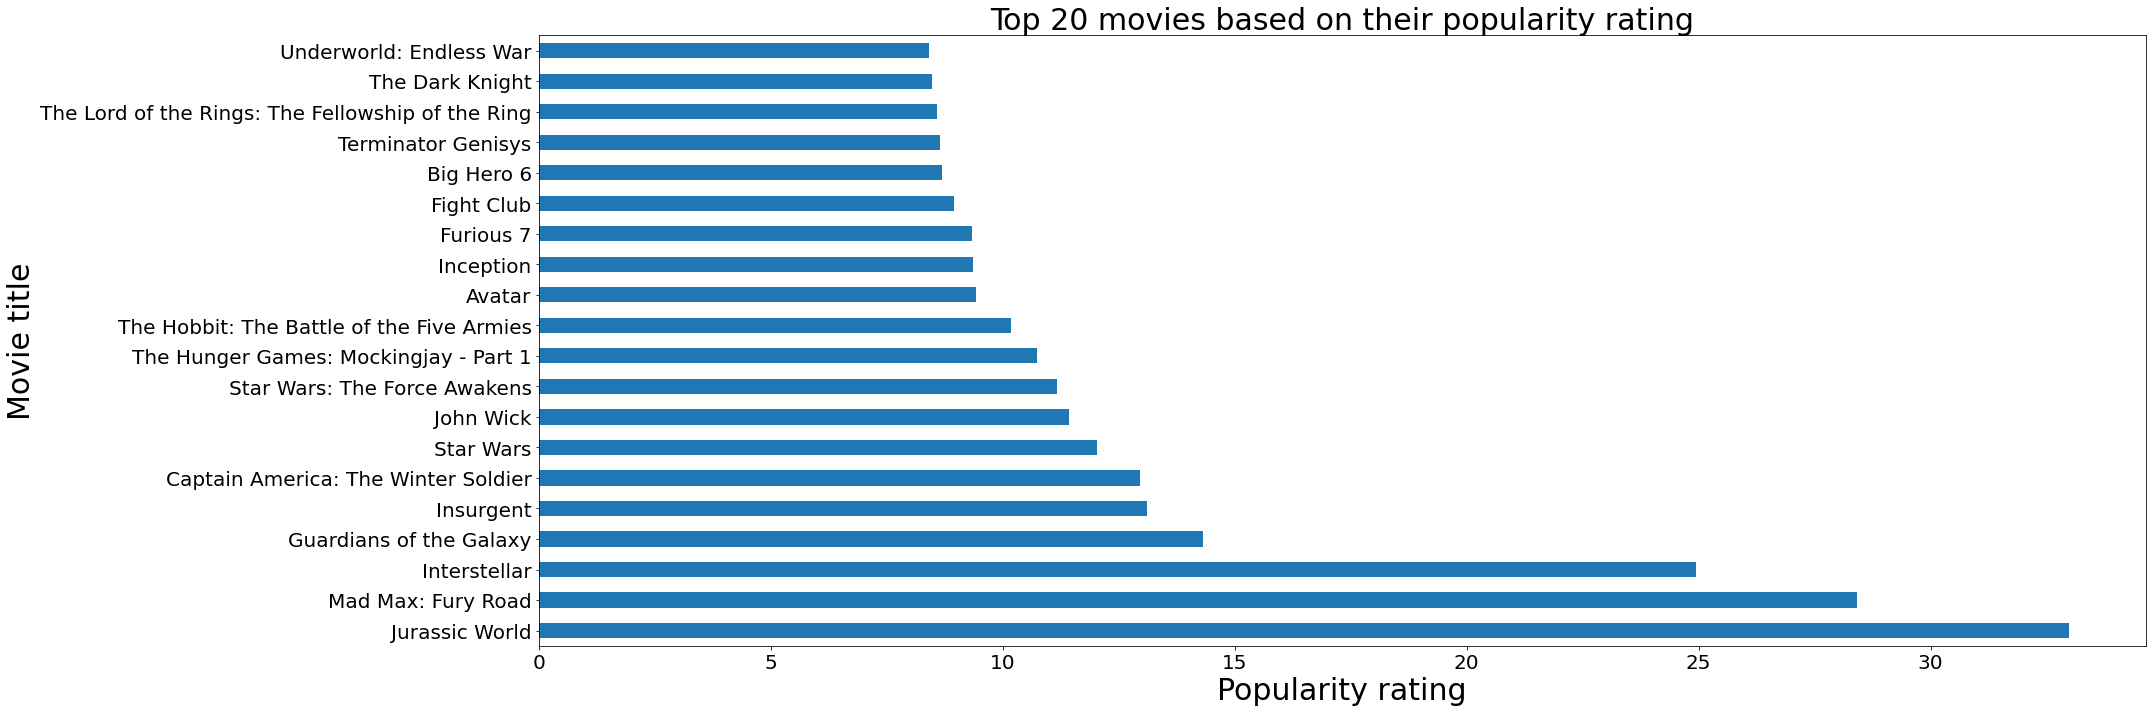

In [ ]:

plt.figure(figsize=(30,10))

movie_popularity.plot(kind='barh')
plt.tick_params(labelsize=20)
plt.title('Top 20 movies based on their popularity rating',fontsize=30)
plt.xlabel('Popularity rating',fontsize=30)
plt.ylabel('Movie title',fontsize=30)

plt.tight_layout()

### Which movie had the highest budget?

In [ ]:
movie_budget=df.groupby('original_title')['budget'].mean().sort_values(ascending=False).iloc[:10]

print(movie_budget)


original_title
The Warrior's Way                              425000000.0
Pirates of the Caribbean: On Stranger Tides    380000000.0
Pirates of the Caribbean: At World's End       300000000.0
Avengers: Age of Ultron                        280000000.0
Superman Returns                               270000000.0
Tangled                                        260000000.0
John Carter                                    260000000.0
Spider-Man 3                                   258000000.0
The Lone Ranger                                255000000.0
The Hobbit: An Unexpected Journey              250000000.0
Name: budget, dtype: float64


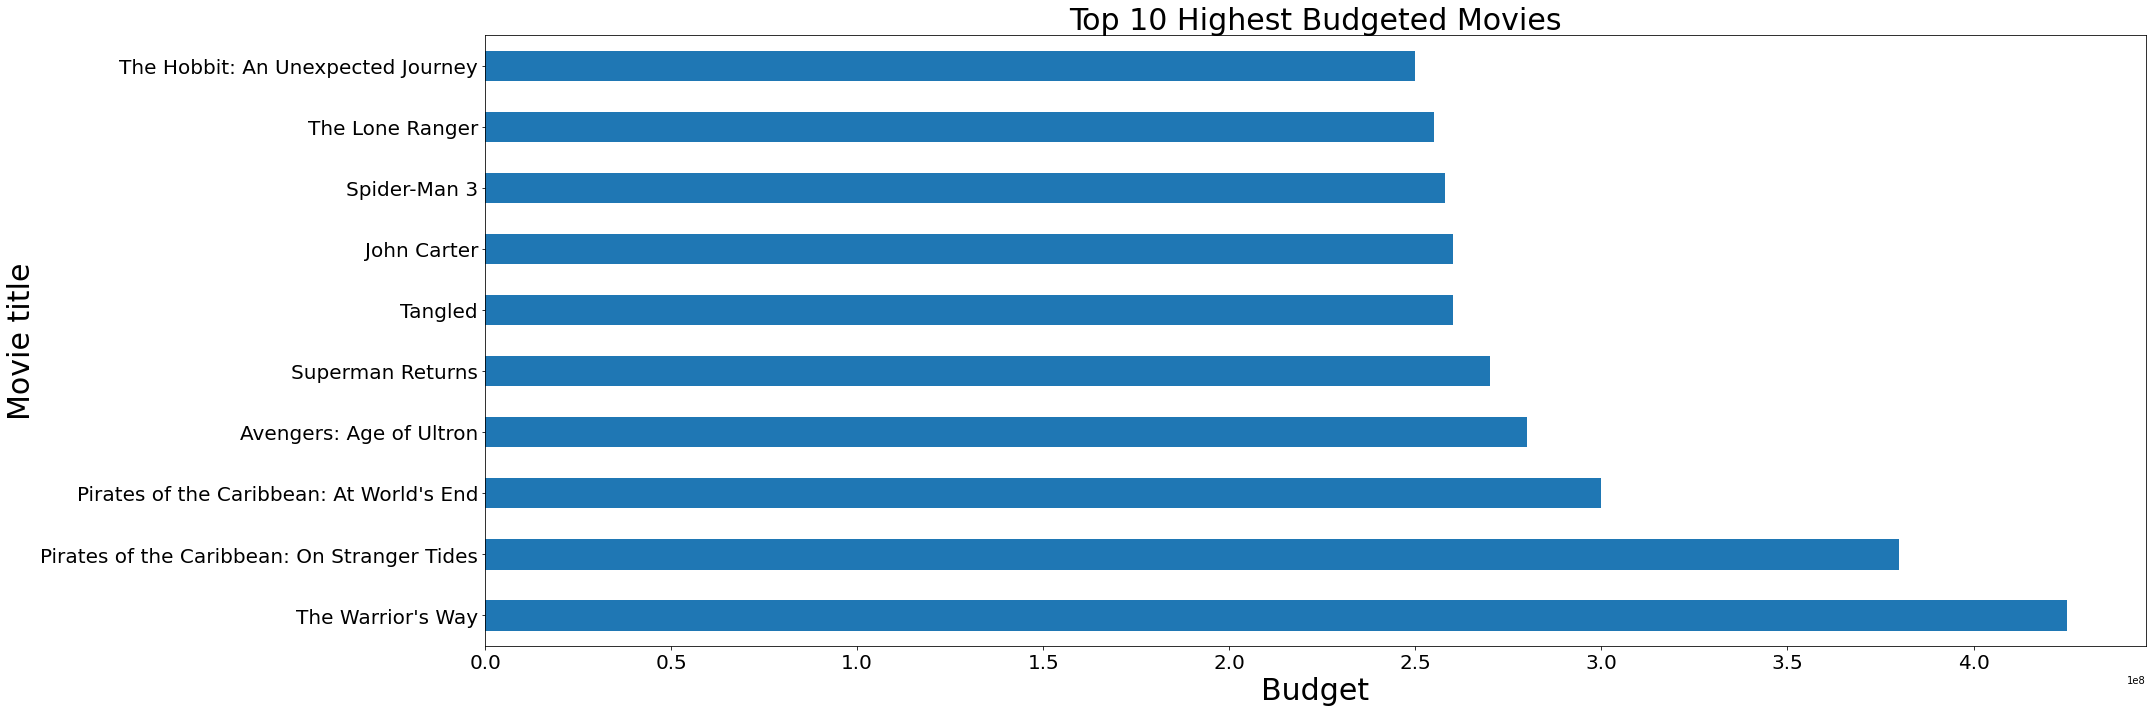

In [ ]:
plt.figure(figsize=(30,10))

movie_budget.plot(kind='barh')
plt.tick_params(labelsize=20)
plt.title('Top 10 Highest Budgeted Movies',fontsize=30)
plt.xlabel('Budget',fontsize=30)
plt.ylabel('Movie title',fontsize=30)

plt.tight_layout()

### Which movie had the highest revenue?

In [ ]:
movie_revenue=df.groupby('original_title')['revenue'].mean().sort_values(ascending=False).iloc[:10]

print(movie_revenue)


original_title
Avatar                                           2.781506e+09
Star Wars: The Force Awakens                     2.068178e+09
Jurassic World                                   1.513529e+09
Furious 7                                        1.506249e+09
Avengers: Age of Ultron                          1.405036e+09
Harry Potter and the Deathly Hallows: Part 2     1.327818e+09
Iron Man 3                                       1.215440e+09
Minions                                          1.156731e+09
Transformers: Dark of the Moon                   1.123747e+09
The Lord of the Rings: The Return of the King    1.118889e+09
Name: revenue, dtype: float64


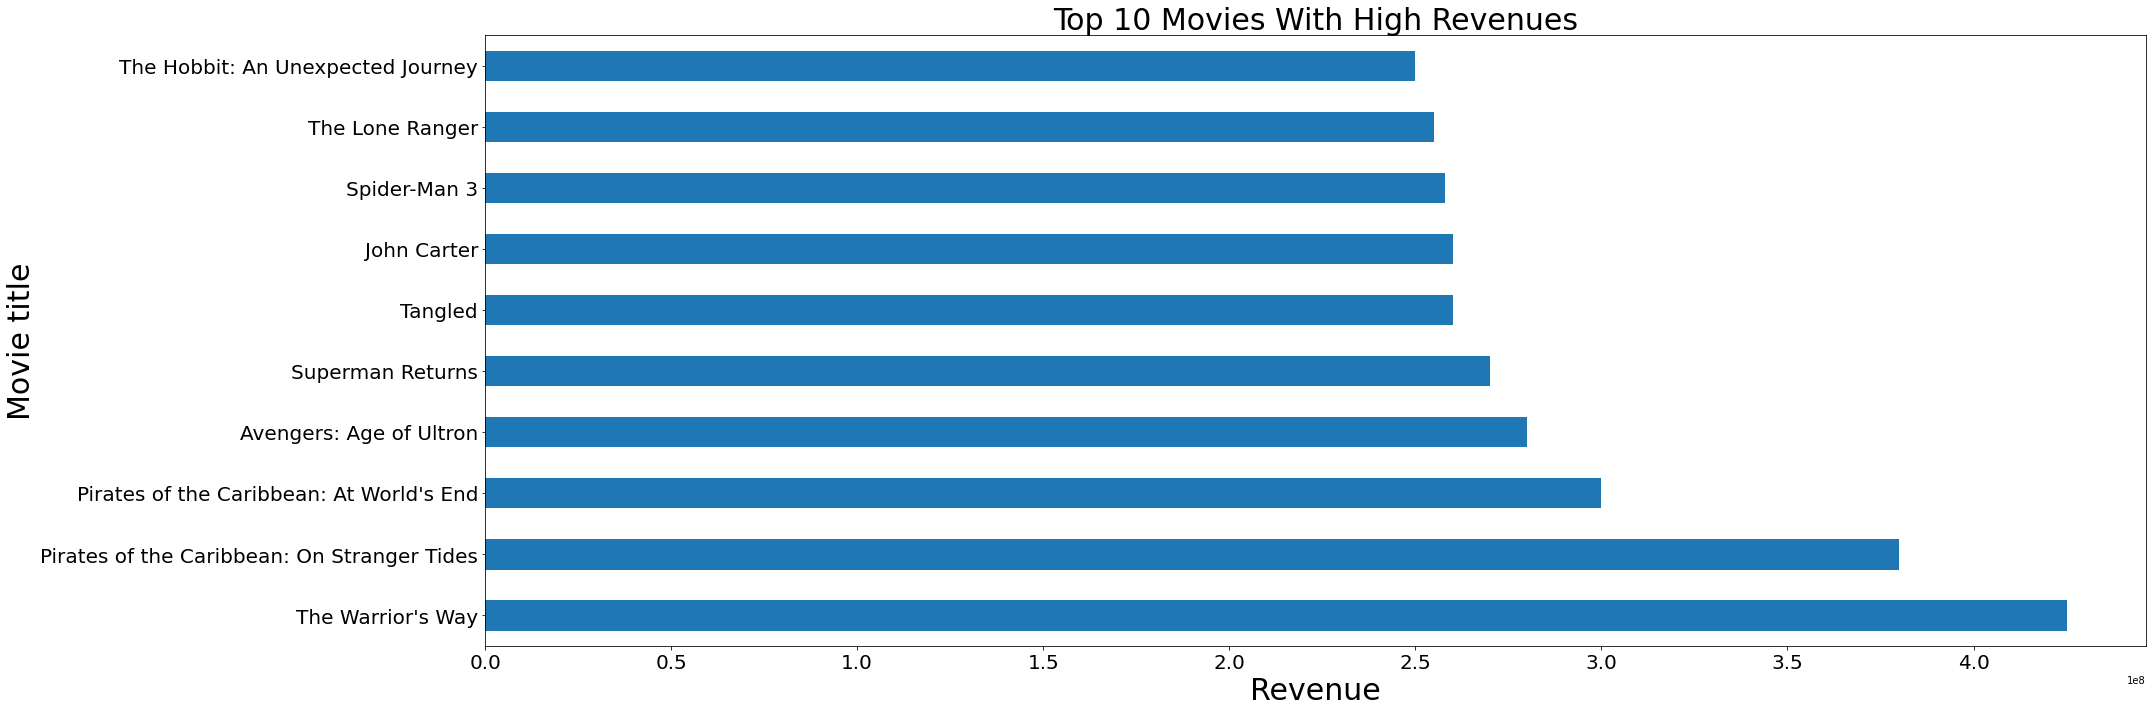

In [ ]:
plt.figure(figsize=(30,10))

movie_budget.plot(kind='barh')
plt.tick_params(labelsize=20)
plt.title('Top 10 Movies With High Revenues',fontsize=30)
plt.xlabel('Revenue',fontsize=30)
plt.ylabel('Movie title',fontsize=30)

plt.tight_layout()

### How does the budget and revenue correlate?

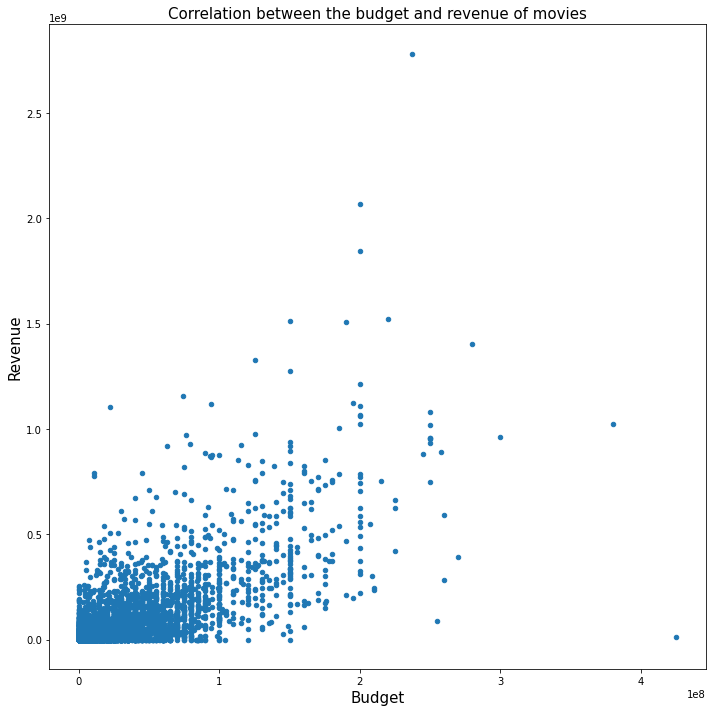

In [ ]:
df.plot(x='budget', y= 'revenue', kind ='scatter', figsize =(10,10))

plt.tick_params(labelsize=10)
plt.title('Correlation between the budget and revenue of movies',fontsize=15)
plt.xlabel('Budget',fontsize=15)
plt.ylabel('Revenue',fontsize=15)

plt.tight_layout()

### What is the most common genre of movie produced?


In [ ]:
val = df['genres'].str.cat(sep='|')
data = pd.Series(val.split('|'))


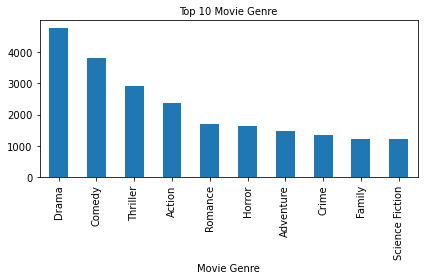

In [ ]:
data.value_counts(ascending=False).iloc[:10].plot(kind='bar')
plt.tick_params(labelsize=10)
plt.title('Top 10 Movie Genre',fontsize=10)
plt.xlabel('Movie Genre',fontsize=10)

plt.tight_layout()

<a id='conclusions'></a>
## Conclusions



### Results of Analysis 
> Based on questions asked at the introduction, and the exploratory analysis carried out on the TMDb movie data set, we can answer the following questions:
>1. Which movie had the highest popularity rating? **Jurassic World**
>2. Which movie had the highest budget? **The Warrior's Way**
>3. Which movie had the highest revenue? **The Warrior's Way**
>4. How does the budget and revenue correlate? **They are not particularly correlated, although some cases show a positive correlation. We cannot conclude based on the correlation alone**
>5. What is the most common genre of movie produced? **Drama**

